### El método de Kriging

Básicamente consiste en dos pasos.
El primer paso es obtener la covarianza espacial de los puntos muestreados. Esta covarianza se obtiene ajustando un variograma.


El segundo paso es usar los pesos derivados de esta estructra de covarianza para interporlar valores de puntos no muestreados o bloques a través del campo muestreal.

Un variograma es una descripción visual de la covarianza exhibida entre cada par de puntos de la muestra. El resultado refleja la distancia máxmima y la forma en que un punto tiene influencia sobre otro a diferentes distancias.

Para cada par de puntos de la muestra, el valor-gamma o semivarianza (una medida de la diferencia media cuadrática entre los valores) es graficado contra la distancia o "lag" que hay entre ellos.

Los modelos de variograma se escogen a partir de un número limitado de funciones "permitidas" como la función lineal, esférica, exponencial y de potencia.

La elección del modelo del variograma recae en el usuario aunque existen programas que pueden ayudar a definir los mejores modelos de ajuste usando varias técnicas como mínimos cuadrados, estimador máximo verosímil y métodos Bayesianos.

Hay **tres suposiciones** que uno hace al momento de estar interpolando por Kriging.
* **Los datos tienen una distribución normal**

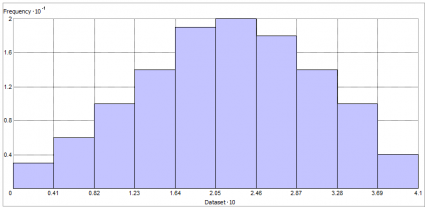
* **La colección de datos es estacionaria**, es decir, no importan cambios en diferentes áreas del mapa. Por ejemplo. Por ejemplo, dos puntos de una superficie con una distancia entre sí de cinco metros deberían tener valores similares. La varianza es casi constante en diferentes áreas del mapa. Por ende, el método de Kriging no es bueno para cambios abruptos. Puedes chechar la estacionariedad de tus datos con un mapa de Voronoi.

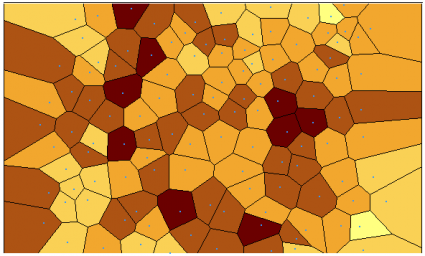

* **Los datos no tiene tendencias**. Tener cambios sistématicos en los datos en casi toda el área de estudio no es recomendable para el método de Kriging.

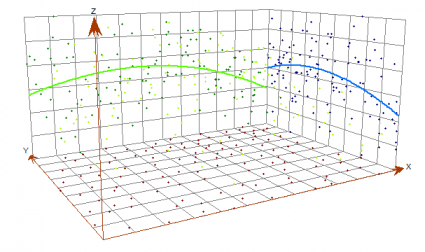


[[10.0, 100.0, 100.0], [13.0, 20.0, 120.0], [14.0, 33.0, 432.0], [15.0, 45.0, 45.0], [19.0, 76.0, 223.0], [20.0, 140.0, 12.0], [27.0, 21.0, 65.0], [30.0, 51.0, 78.0], [40.0, 67.0, 89.0], [41.0, 66.0, 67.0], [42.0, 59.0, 34.0], [43.0, 58.0, 385.0], [48.0, 71.0, 872.0], [49.0, 72.0, 356.0], [53.0, 10.0, 685.0], [55.0, 12.0, 845.0], [56.0, 50.0, 888.0], [57.0, 40.0, 200.0], [59.0, 48.0, 548.0], [60.0, 100.0, 482.0]]
[[ 10. 100. 100.]
 [ 13.  20. 120.]
 [ 14.  33. 432.]
 [ 15.  45.  45.]
 [ 19.  76. 223.]
 [ 20. 140.  12.]
 [ 27.  21.  65.]
 [ 30.  51.  78.]
 [ 40.  67.  89.]
 [ 41.  66.  67.]
 [ 42.  59.  34.]
 [ 43.  58. 385.]
 [ 48.  71. 872.]
 [ 49.  72. 356.]
 [ 53.  10. 685.]
 [ 55.  12. 845.]
 [ 56.  50. 888.]
 [ 57.  40. 200.]
 [ 59.  48. 548.]
 [ 60. 100. 482.]]


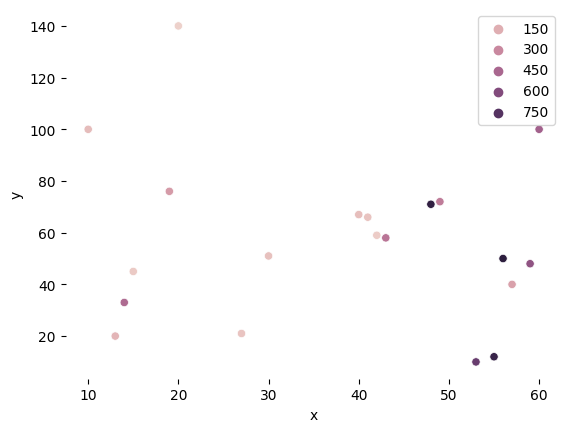

[[5.00000000e+01 7.29620000e+04]
 [9.27846970e+01 6.55220000e+04]
 [8.12711511e+01 1.25000000e+03]
 [7.10633520e+01 9.54845000e+04]
 [4.75078941e+01 3.35405000e+04]
 [5.65685425e+01 1.10450000e+05]
 [8.56154192e+01 8.69445000e+04]
 [5.74543297e+01 8.16080000e+04]
 [3.85875628e+01 7.72245000e+04]
 [3.89486842e+01 8.61125000e+04]
 [4.47772264e+01 1.00352000e+05]
 [4.53100430e+01 4.70450000e+03]
 [3.13847097e+01 7.60500000e+04]
 [3.00832179e+01 7.93800000e+03]
 [9.02718118e+01 2.06045000e+04]
 [8.81419310e+01 6.58845000e+04]
 [5.01597448e+01 8.24180000e+04]
 [6.00749532e+01 3.97620000e+04]
 [5.20096145e+01 2.17800000e+03]
 [0.00000000e+00 0.00000000e+00]]


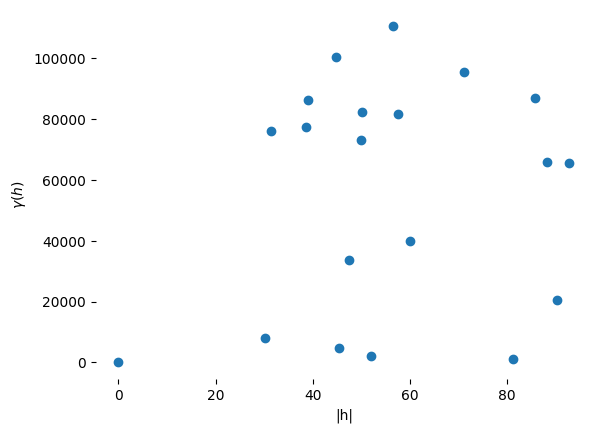

'# Variograma experimental\n\nbins_variogramaexp = []\ncuenta_variogramaexp = []\nsuma_variogramaexp = []\n\nbins = 40\ndistancia_media = distanciamax/2.0\nfor i in range(bins):\n    bins_variogramaexp.append(distancia_media*(i+0.5)/bins)\n    suma_variogramaexp.append(0.0)\n    cuenta_variogramaexp.append(0)\n\n\nfor punto in puntos_variograma:\n    bin_correcto = math.floor(bins*punto[0]/distancia_media)\n    if bin_correcto < bins:\n        suma_variogramaexp[bin_correcto] += punto[1]\n        cuenta_variogramaexp[bin_correcto] += 1\n\npromedio_variogramaexp = []\nfor i in range(bins):\n    if cuenta_variogramaexp[i] > 0.0:\n        promedio_variogramaexp.append(suma_variogramaexp[i]/cuenta_variogramaexp[i])\n    else:\n        promedio_variogramaexp.append(0.0)\n\nexponencial_variogramateorico = []\ngaussiano_variogramateorico = []\nesferico_variogramateorico = []\nestiloexp = []\nestilogaussiano = []\nestiloesferio = []\n\nsill_exp = 0\nsill_gauss = 0\nsill_esferico = 0\n\nrange_e

In [23]:
import csv
import math
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import coo_matrix
from pyinterpolate import build_experimental_variogram, build_theoretical_variogram, kriging



def distancia(punto1,punto2):
    return math.sqrt((punto2[0]-punto1[0])*(punto2[0]-punto1[0])+(punto2[1]-punto1[1])*(punto2[1]-punto1[1]))



# input
lista_puntos = []
with open('C:/Users/ferna/Documents/documentos/Universidad/Servicio-Social-CienciadeDatos/myNotebooks/samplexyz.csv') as csvfile:
    reader = csv.reader(csvfile,delimiter=",")
    header = next(reader)
    for line in reader:
        p = list(map(float,line))
        lista_puntos.append(p)
print(lista_puntos)


# quitar duplicados

lista_depuntos_sindobles = []
for punto1 in lista_puntos:
    repetidos = False
    for punto2 in lista_depuntos_sindobles:
        if punto1[0] == punto2[0] and punto1[1] == punto2[1]:
            repetidos = True
    if repetidos == False:
        lista_depuntos_sindobles.append(punto1)
    else:
        print("Punto repetido " + str(punto1[0]) + " " + str(punto1[1]))

puntos = np.array(lista_depuntos_sindobles)


# Una lista de listas de puntos [x,y,z] 
print(puntos)


# grafica del conjunto de puntos

plt.figure(1)
dataplot = sns.scatterplot(x=puntos[:,0], y=puntos[:,1], hue=puntos[:,2]) # hue=puntos[:,2]
sns.despine(left=True,bottom=True)
plt.xlabel('x')
plt.ylabel('y')

# Mostramos una grafica en 2D de x,y y z. Colocamos de distintos colores a z para mostrar las diferencias.
plt.show()


# nube de variograma
lista_puntos_variograma = []
distanciamax = 0.0
probabilidad = 1.0
for punto1 in puntos:
    for punto2 in puntos:
        if random.random() >= probabilidad:
            continue
    h = distancia(punto1,punto2)
    if h > distanciamax:
        distanciamax = h
    lista_puntos_variograma.append([h,0.5*(punto2[2]-punto1[2])*(punto2[2]-punto1[2])])

puntos_variograma = np.array(lista_puntos_variograma)

# Imprimimos puntos
print(puntos_variograma)

plt.figure(2)
plt.plot(puntos_variograma[:,0],puntos_variograma[:,1], 'o')
sns.despine(left=True,bottom='True')
plt.xlabel("|h|")
plt.ylabel("$\gamma(h)$")

# Mostramos nube de variograma
plt.show()


In [10]:
# Create logistic map

def generate_logistic_map(r: float, size: int, initial_ratio: float) -> np.array:
    # rxn(1-xn)
    vals = [initial_ratio]
    for _ in range(size-1):
        new_val = r * vals[-1] * (1 - vals[-1])
        vals.append(new_val)
    return np.array(vals)


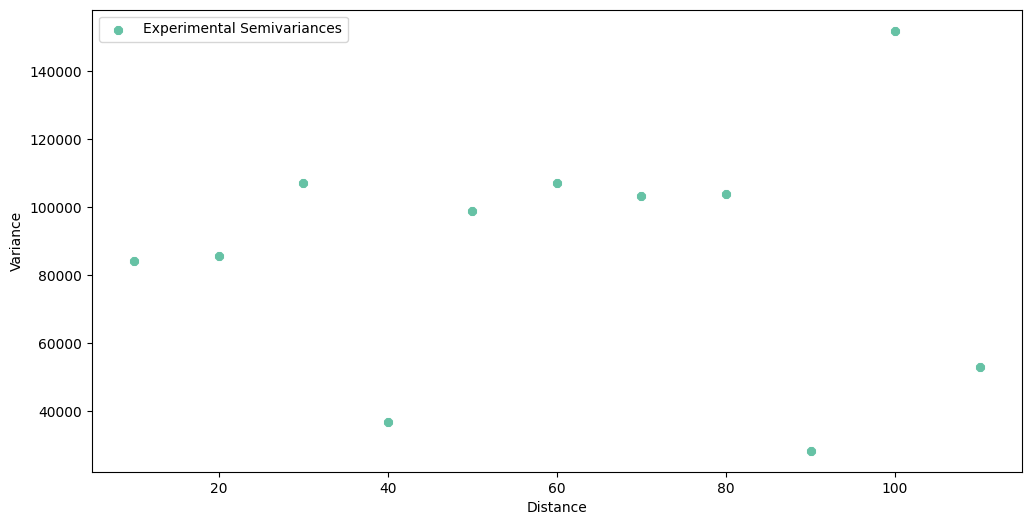

In [24]:
step_radius = 10
max_range = 120

experimental_variogram = build_experimental_variogram(puntos,step_radius,max_range)

experimental_variogram.plot()

In [12]:
#experimental_variogram.plot(plot_semivariance=True, plot_covariance=True, plot_variance=True)
#semivars = experimental_variogram.experimental_semivariance_array.copy()


In [13]:
#plt.figure(figsize=(15, 6))
#plt.scatter(semivars[:, 0], semivars[:, 1])
#plt.show()

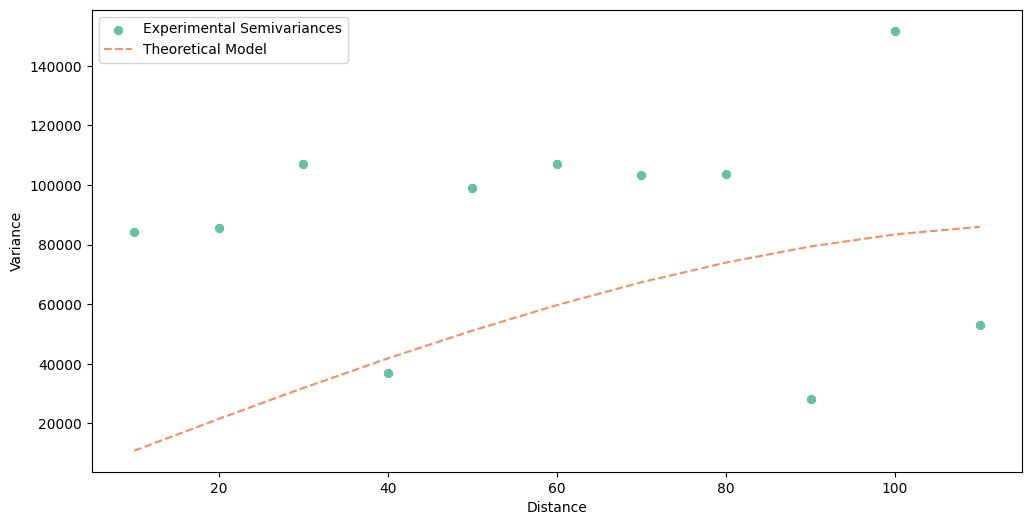

* Selected model: Spherical model
* Nugget: 0.0
* Sill: 86856.51000000001
* Range: 120
* Spatial Dependency Strength is Unknown
* Mean Bias: 32060.338460783867
* Mean RMSE: 52420.56915441953
* Error-lag weighting method: None


+-------+--------------------+--------------------+---------------------+
|  lag  |    theoretical     |    experimental    |     bias (y-y')     |
+-------+--------------------+--------------------+---------------------+
|  10.0 | 10831.931657986113 | 84220.53846153847  |  73388.60680355235  |
|  20.0 | 21513.07076388889  | 85550.22222222222  |  64037.151458333334 |
|  30.0 | 31892.624765625005 | 107016.60344827586 |  75123.97868265085  |
|  40.0 | 41819.80111111112  | 36802.54347826087  |  -5017.257632850247 |
|  50.0 | 51143.80724826389  | 98961.24390243902  |  47817.43665417513  |
|  60.0 | 59713.85062500001  | 107012.48148148147 |  47298.63085648147  |
|  70.0 | 67379.13868923612  | 103263.55555555556 |  35884.41686631944  |
|  80.0 |  73988.8788888889  | 1

In [25]:
semivars = build_theoretical_variogram(
    experimental_variogram=experimental_variogram, 
    model_type='spherical', 
    sill=experimental_variogram.variance, 
    rang = 120)

semivars.plot()

print(semivars)

In [27]:
valor_conocido = puntos[5]
print(valor_conocido)

[ 20. 140.  12.]


In [33]:
# kriging recibe los el conjunto de puntos, la tabla de 
# teorico-exponencial-bias y algun valor z del que
# conocer a que pareja ordenada x,y corresponderia su valor


ok_interpolacion = kriging(puntos,semivars,[valor_conocido[:-1]])
ok_interpolacion

100%|██████████| 1/1 [00:00<?, ?it/s]


array([[ 12.,  nan,  20., 140.]])

In [ ]:
def test_kriging(train_data, variogram_model, ktype, test_values, number_of_neighbors, sk_mean_value=None):
    predictions = kriging(observations=train_data,
                          theoretical_model=variogram_model,
                          points=test_values[:, :-1],
                          how=ktype,
                          no_neighbors=number_of_neighbors,
                          number_of_workers=1,
                          sk_mean=sk_mean_value)
    mse = np.mean((predictions[:, 0] - test_values[:, -1])**2)
    rmse = np.sqrt(mse)
    return rmse